# FacetGrid

In [2]:
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

peliculas = pd.read_csv('RatingsPeliculas.csv')
peliculas.columns = ['Pelicula', 'Genero', 'RatingsCriticos', 'RatingsAudiencia', 'PresupuestoMillones', 'Año']

peliculas.Pelicula = peliculas.Pelicula.astype('category')
peliculas.Genero = peliculas.Genero.astype('category')
peliculas.Año = peliculas.Año.astype('category')
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pelicula             559 non-null    category
 1   Genero               559 non-null    category
 2   RatingsCriticos      559 non-null    int64   
 3   RatingsAudiencia     559 non-null    int64   
 4   PresupuestoMillones  559 non-null    int64   
 5   Año                  559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


---

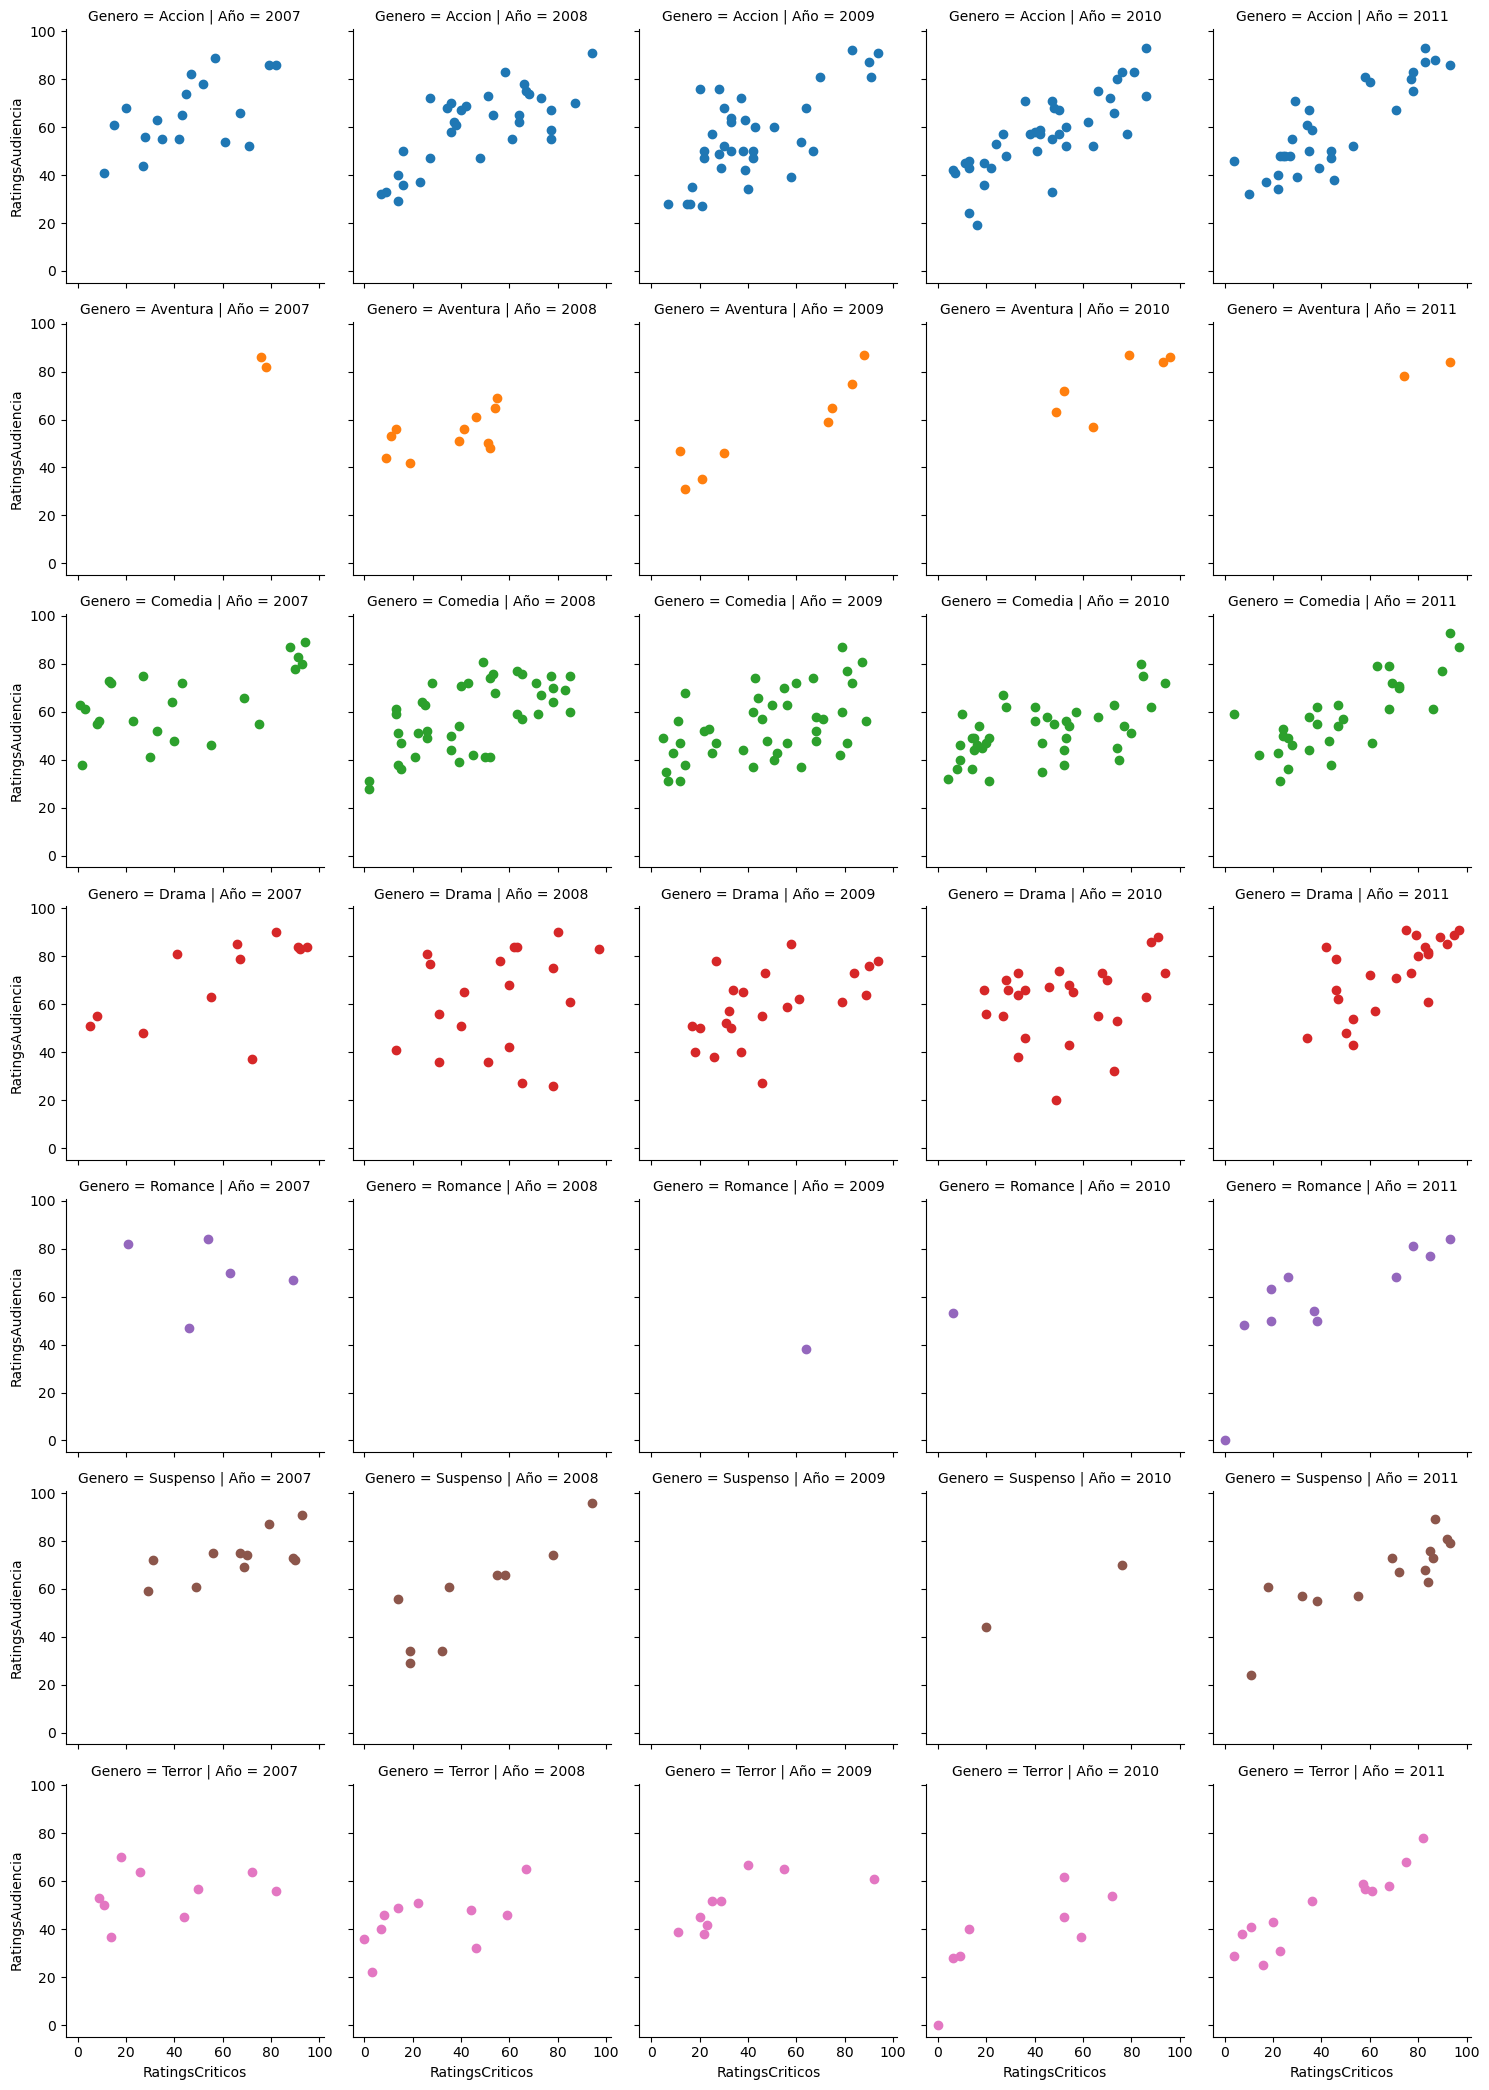

In [5]:
g = sns.FacetGrid(data=peliculas, row="Genero", col="Año", hue="Genero")

# El método .map asigna un gráfico a cada celda (en este caso, un scatter plot). 
# Las variables del eje x e y se pasan como cadenas porque Seaborn las busca automáticamente en el DataFrame.
g = g.map(plt.scatter, "RatingsCriticos", "RatingsAudiencia")

plt.show()

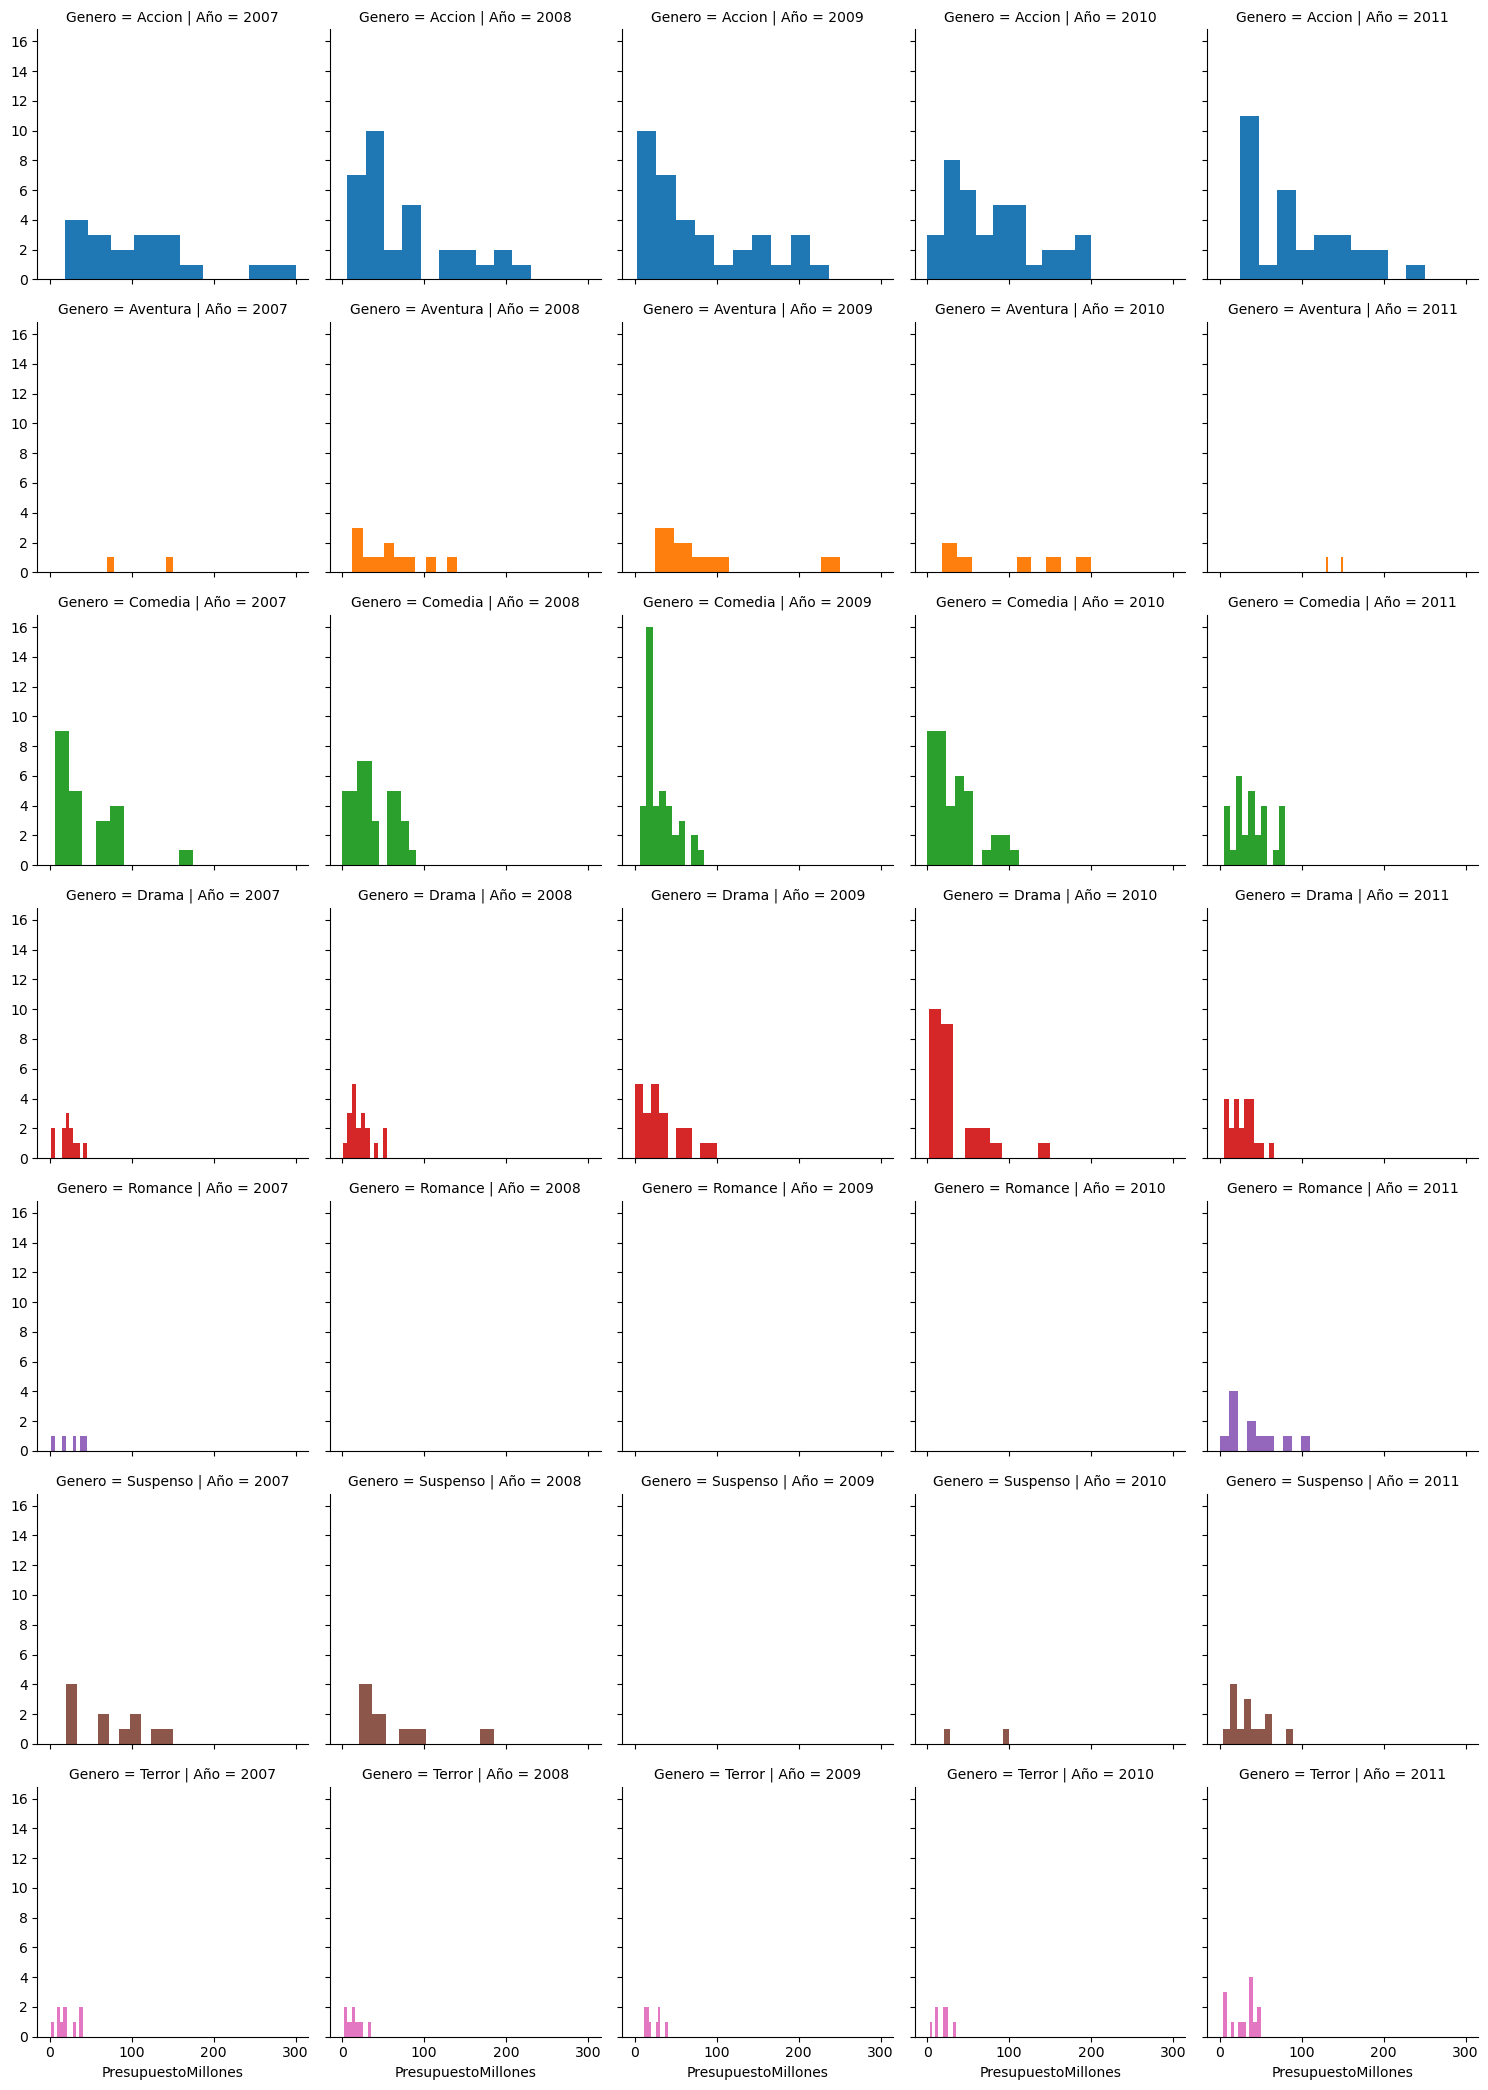

In [15]:
# Se puede rellenar con cualquier tipo de gráfico. Ejemplo: Histogramas.

g = sns.FacetGrid(data=peliculas, row="Genero", col="Año", hue="Genero")
g = g.map(plt.hist, "PresupuestoMillones")
plt.show()

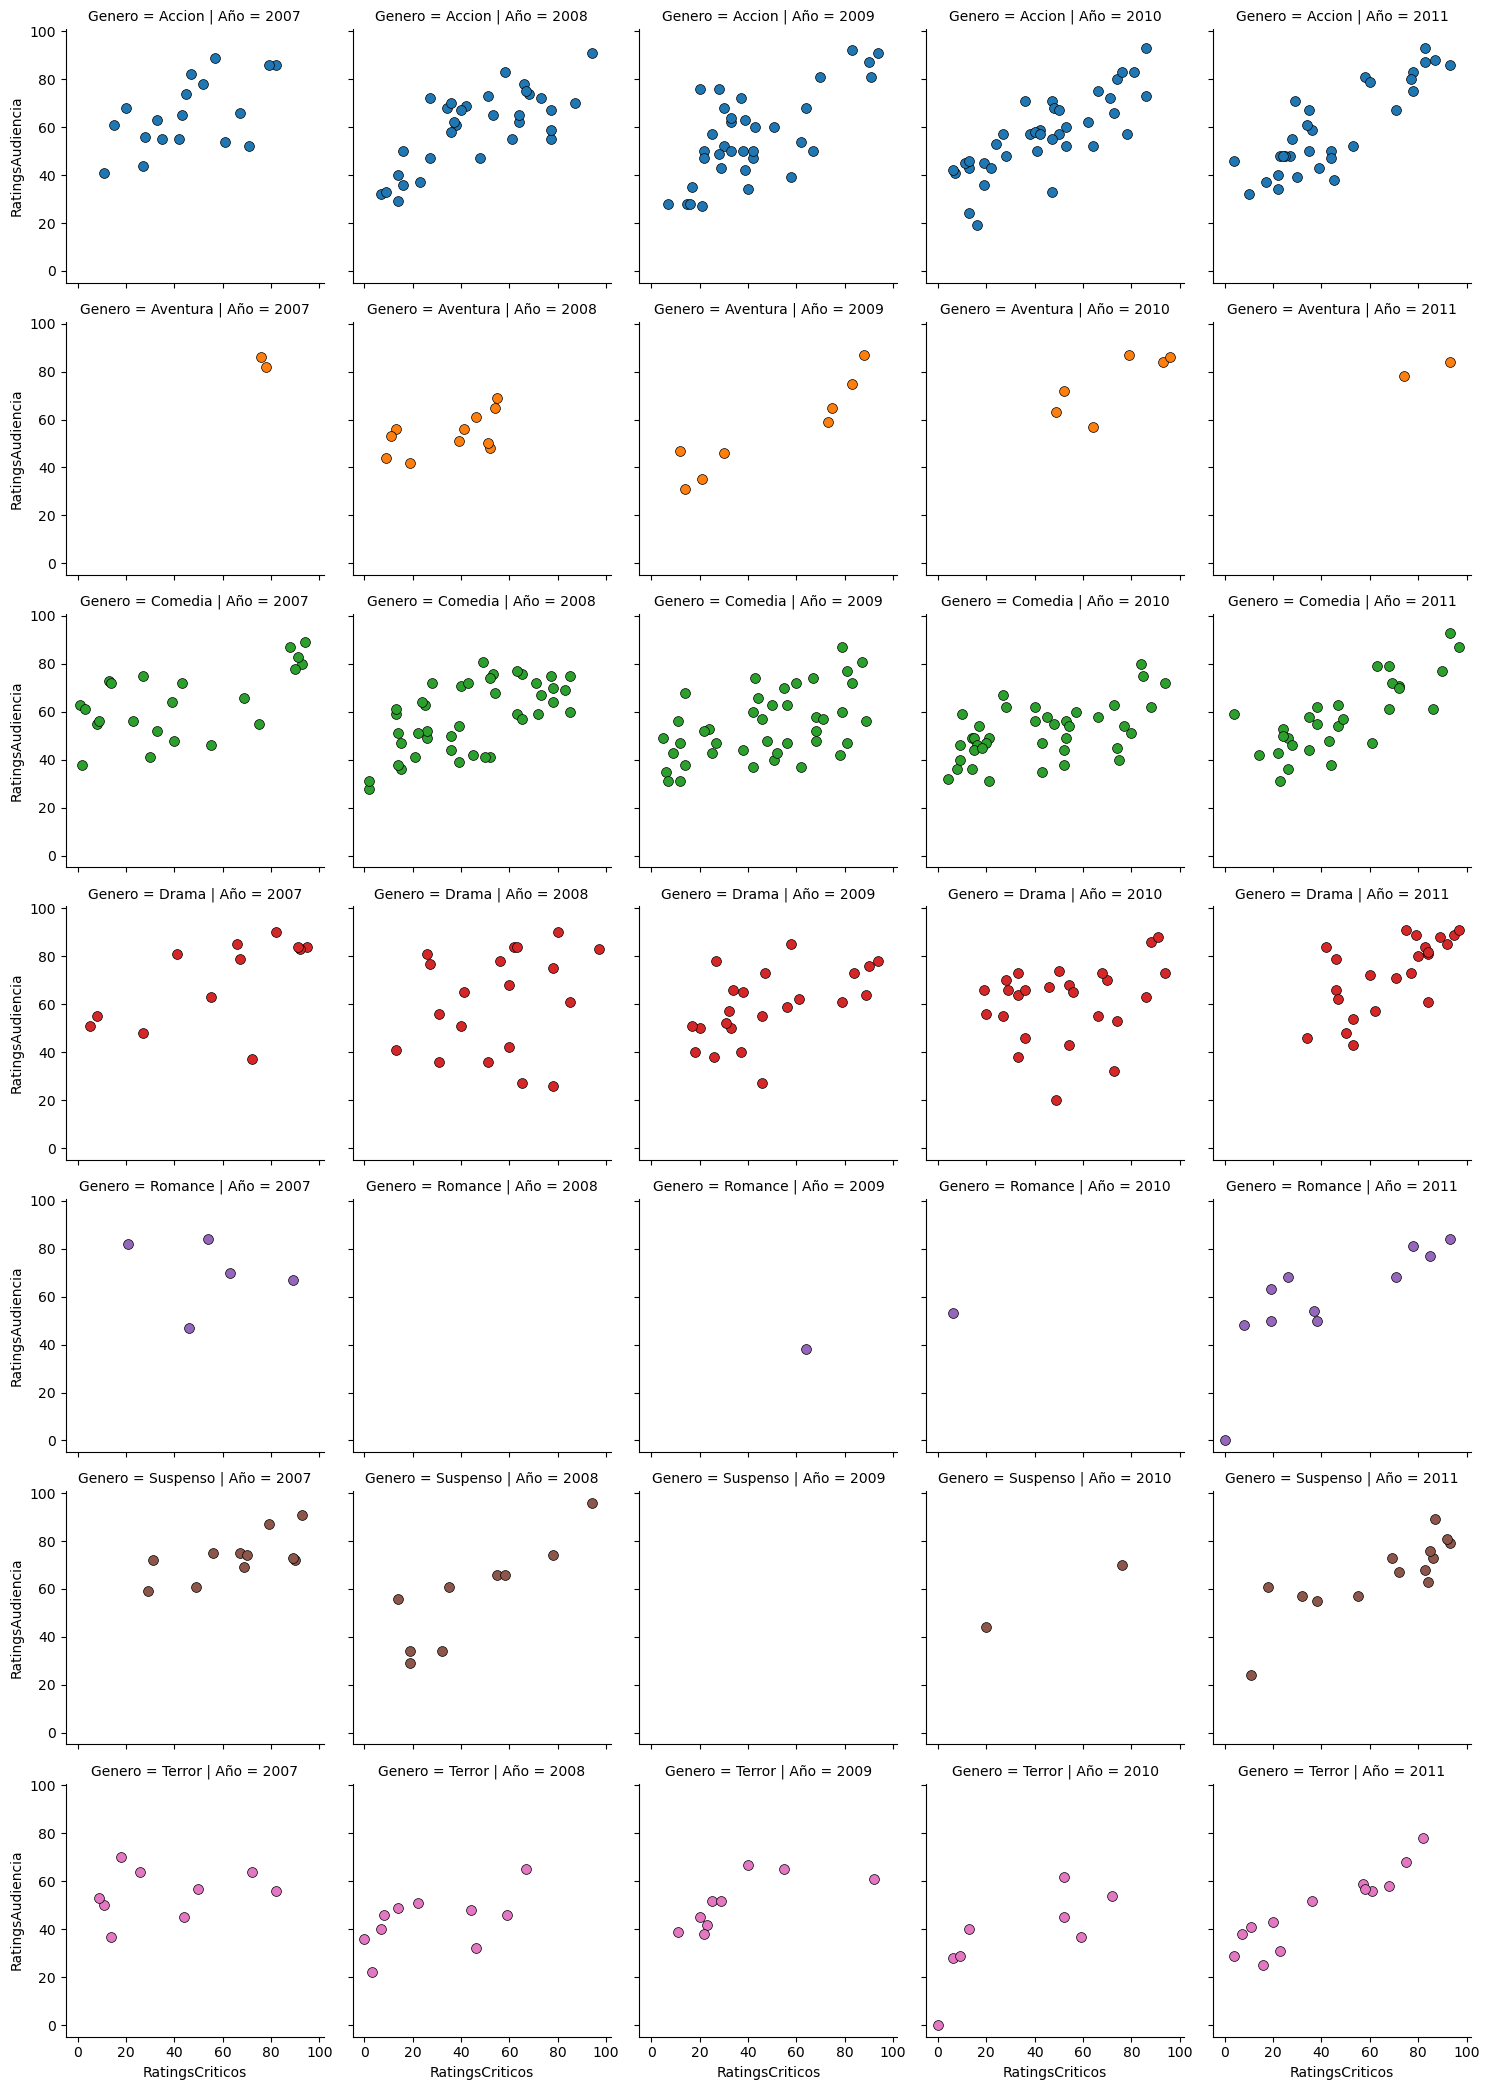

In [23]:
# Regreso a los diagramas de dispersión.

g = sns.FacetGrid(data=peliculas, row="Genero", col="Año", hue="Genero")

# Diccionario con opciones de estilo para los puntos: tamaño (s), grosor borde (linewidth), color borde (edgecolor).
kws = dict(s=50, linewidth=0.5, edgecolor="black")

# **kws desempaqueta el diccionario como argumentos con nombre.
g = g.map(plt.scatter, "RatingsCriticos", "RatingsAudiencia", **kws)

plt.show()

In [8]:
kws

{'s': 50, 'linewidth': 0.5, 'edgecolor': 'black'}

In [9]:
# Diferencia entre FacetGrid y subplot:
# - FacetGrid: Crea automáticamente una cuadrícula de gráficos basada en categorías del DataFrame.
# - Subplot: Requiere especificar manualmente la ubicación de cada gráfico en la cuadrícula.

---

# Coordinadas y diagonales

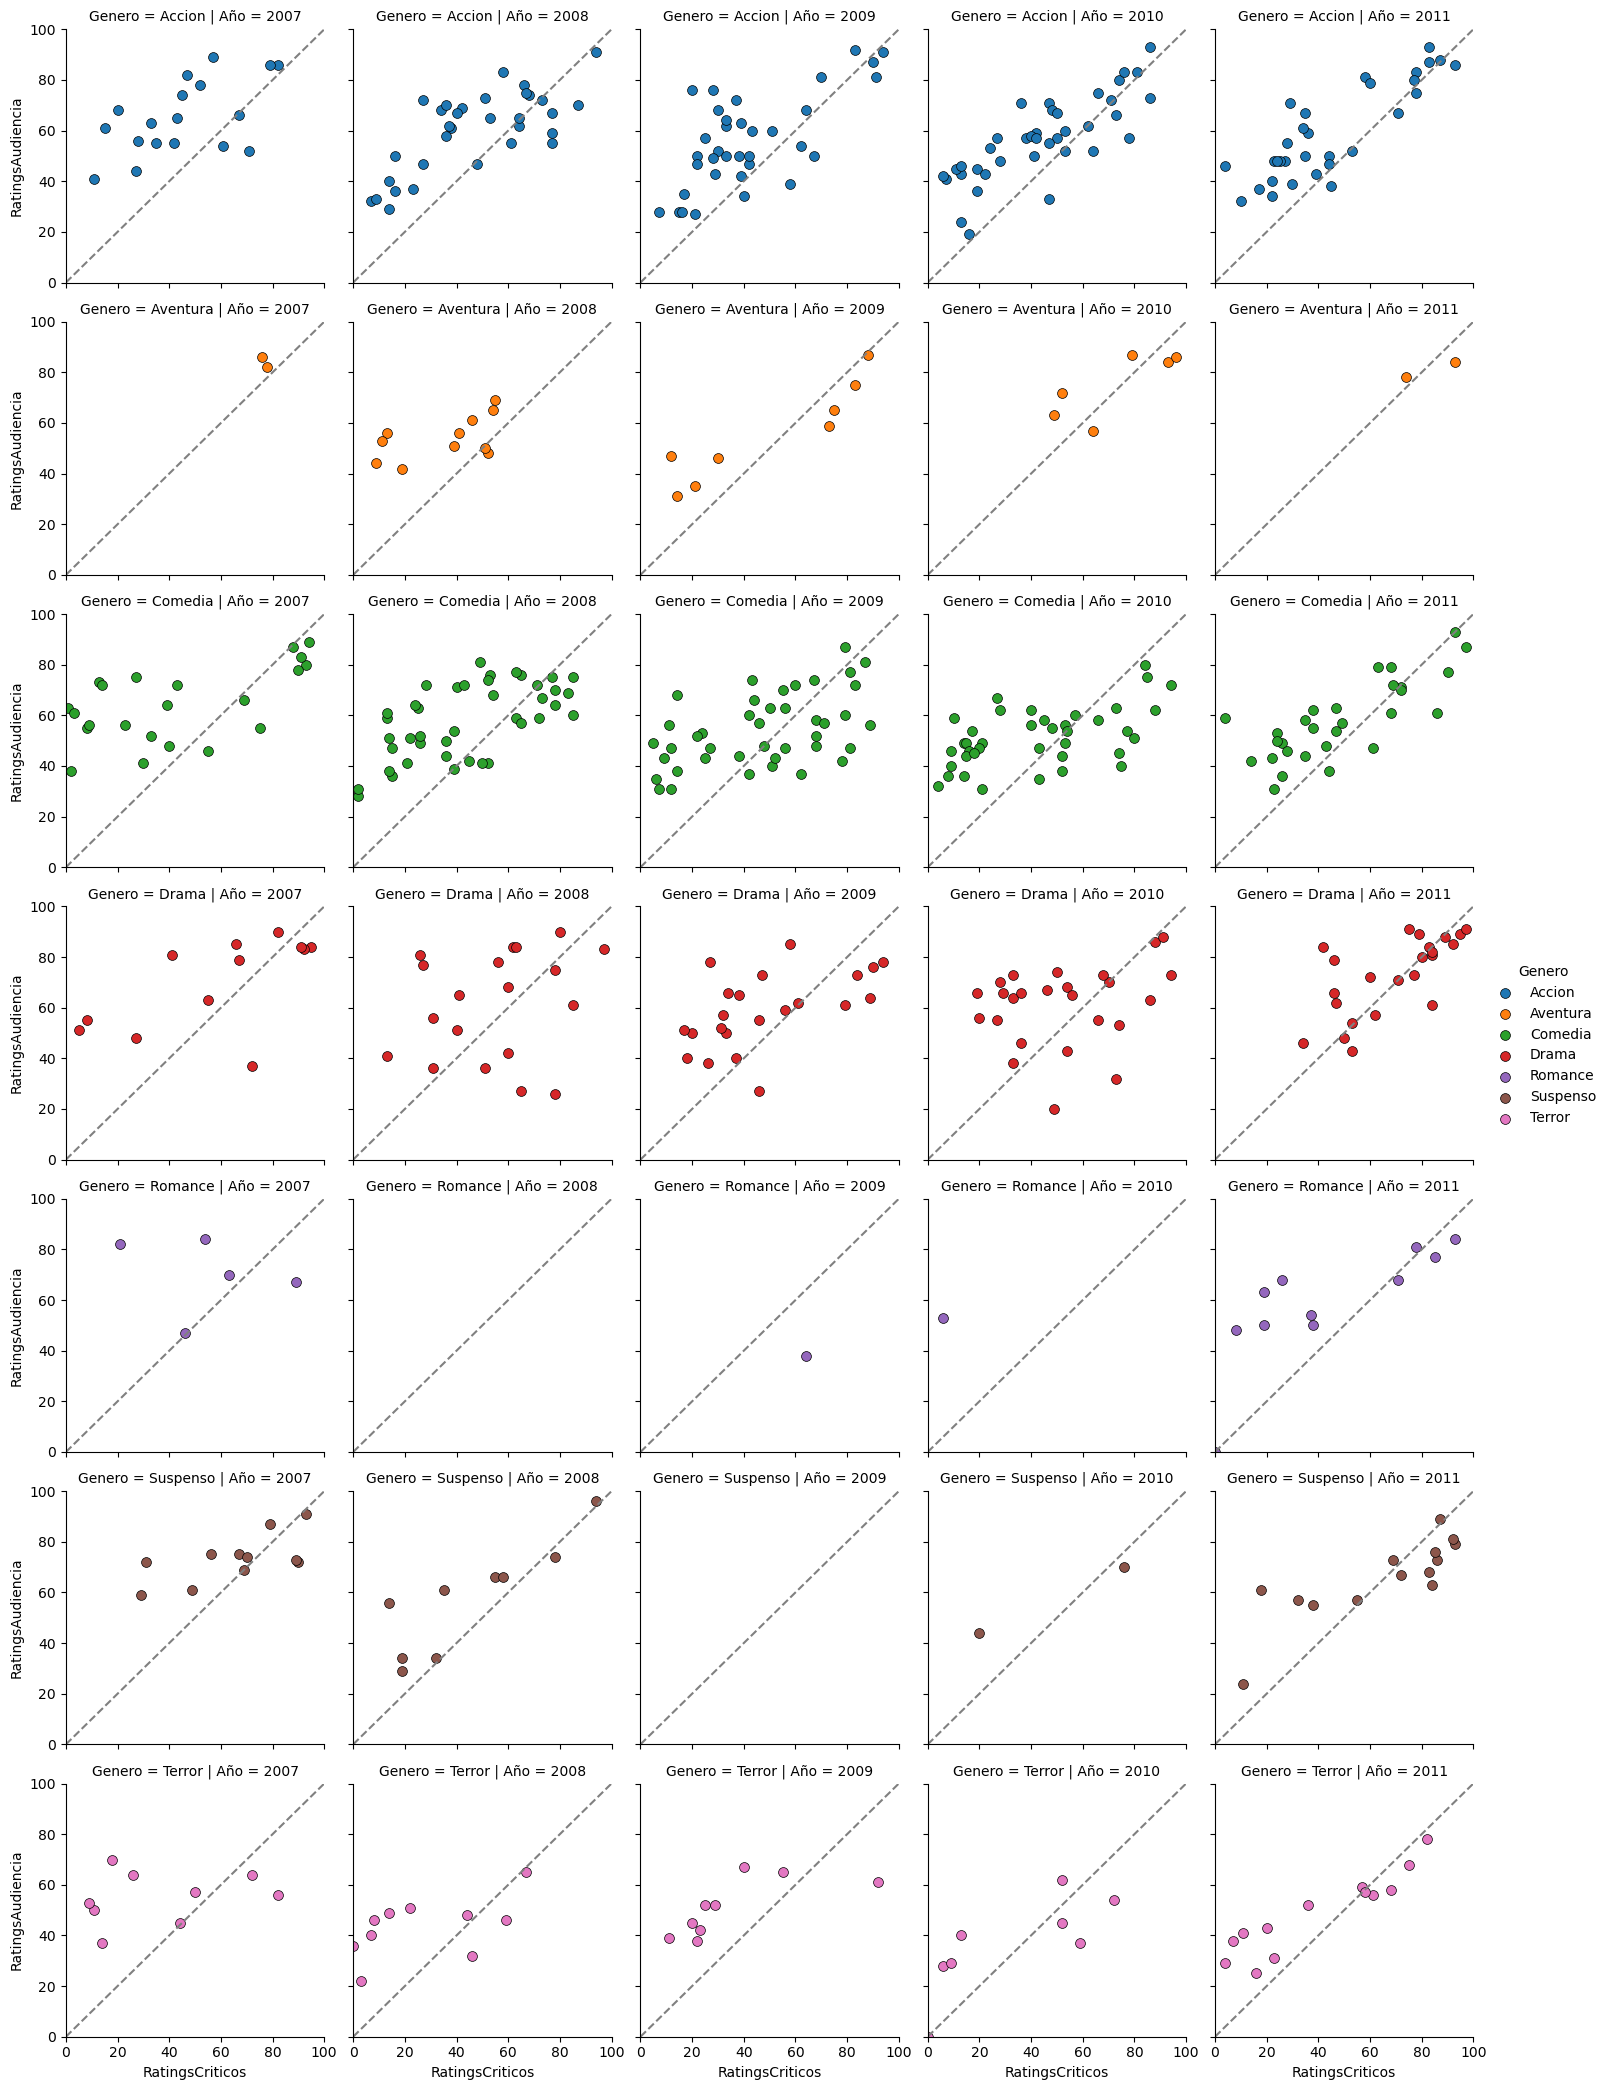

In [37]:
# Controlando ejes y agregando diagonales.

g = sns.FacetGrid(data=peliculas, row="Genero", col="Año", hue="Genero")
kws = dict(s=50, linewidth=0.5, edgecolor="black")
g = g.map(plt.scatter, "RatingsCriticos", "RatingsAudiencia", **kws)

# Establecer límites para los ejes x e y
g.set(xlim=(0,100), ylim=(0, 100))

# Dibujar una línea diagonal en cada gráfico:
for ax in g.axes.flat:
    # g.axes.flat convierte los ejes de la cuadrícula en un array unidimensional
    # y el ciclo recorre cada eje individualmente
    ax.plot((0,100), (0,100), c='gray', ls='--')
    
g.add_legend()

plt.show()

In [ ]:
print(g.axes) # Matriz 2D original de ejes

In [ ]:
print(list(g.axes.flat)) # Array 1D de ejes